In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Momentum Investing

In [4]:
stock=pd.read_csv("ind_nifty500list.csv")
stock.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,360 ONE WAM Ltd.,Financial Services,360ONE,EQ,INE466L01038
1,3M India Ltd.,Diversified,3MINDIA,EQ,INE470A01017
2,ABB India Ltd.,Capital Goods,ABB,EQ,INE117A01022
3,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025
4,AIA Engineering Ltd.,Capital Goods,AIAENG,EQ,INE212H01026


In [5]:
stock["Symbol"]=stock["Symbol"]+str(".NS")

In [6]:
stock_list=stock["Symbol"].to_list()

In [7]:
stock_list

['360ONE.NS',
 '3MINDIA.NS',
 'ABB.NS',
 'ACC.NS',
 'AIAENG.NS',
 'APLAPOLLO.NS',
 'AUBANK.NS',
 'AARTIIND.NS',
 'AAVAS.NS',
 'ABBOTINDIA.NS',
 'ACE.NS',
 'ADANIENSOL.NS',
 'ADANIENT.NS',
 'ADANIGREEN.NS',
 'ADANIPORTS.NS',
 'ADANIPOWER.NS',
 'ATGL.NS',
 'AWL.NS',
 'ABCAPITAL.NS',
 'ABFRL.NS',
 'AEGISLOG.NS',
 'AETHER.NS',
 'AFFLE.NS',
 'AJANTPHARM.NS',
 'APLLTD.NS',
 'ALKEM.NS',
 'ALKYLAMINE.NS',
 'ALLCARGO.NS',
 'ALOKINDS.NS',
 'ARE&M.NS',
 'AMBER.NS',
 'AMBUJACEM.NS',
 'ANANDRATHI.NS',
 'ANGELONE.NS',
 'ANURAS.NS',
 'APARINDS.NS',
 'APOLLOHOSP.NS',
 'APOLLOTYRE.NS',
 'APTUS.NS',
 'ACI.NS',
 'ASAHIINDIA.NS',
 'ASHOKLEY.NS',
 'ASIANPAINT.NS',
 'ASTERDM.NS',
 'ASTRAZEN.NS',
 'ASTRAL.NS',
 'ATUL.NS',
 'AUROPHARMA.NS',
 'AVANTIFEED.NS',
 'DMART.NS',
 'AXISBANK.NS',
 'BEML.NS',
 'BLS.NS',
 'BSE.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BAJAJHLDNG.NS',
 'BALAMINES.NS',
 'BALKRISIND.NS',
 'BALRAMCHIN.NS',
 'BANDHANBNK.NS',
 'BANKBARODA.NS',
 'BANKINDIA.NS',
 'MAHABANK.NS'

In [8]:
data  = yf.download(tickers=stock_list,start='2012-01-01')["Close"]

[*****                 11%                       ]  55 of 499 completedERROR:yfinance:HTTP Error 404: 
[*********************100%***********************]  499 of 499 completed
ERROR:yfinance:
8 Failed downloads:
ERROR:yfinance:['CENTURYTEX.NS', 'IDFC.NS', 'TV18BRDCST.NS', 'ZOMATO.NS', 'HBLPOWER.NS', 'GMRINFRA.NS', 'SUVENPHAR.NS', 'GLS.NS']: YFTzMissingError('possibly delisted; no timezone found')


In [9]:
data.head()

Ticker,360ONE.NS,3MINDIA.NS,AARTIIND.NS,AAVAS.NS,ABB.NS,ABBOTINDIA.NS,ABCAPITAL.NS,ABFRL.NS,ACC.NS,ACE.NS,...,WELSPUNLIV.NS,WESTLIFE.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS,ZENSARTECH.NS,ZFCVINDIA.NS,ZOMATO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,NaN,3287.778564,9.364031,NaN,498.872009,1293.104248,NaN,NaN,952.790649,26.005316,...,2.062516,NaN,144.799820,64.322220,42.488808,104.364914,22.185337,1174.041748,NaN,124.878960
2012-01-03,NaN,3295.211426,9.462602,NaN,508.991913,1278.518311,NaN,NaN,956.848511,26.882942,...,2.132782,NaN,142.996536,67.143364,45.063606,105.526489,22.714115,1158.581055,NaN,123.357880
2012-01-04,NaN,3332.469238,9.383744,NaN,511.135895,1274.552734,NaN,NaN,923.885376,27.206274,...,2.198915,NaN,140.852051,67.425484,44.174789,104.454254,22.076471,1167.192017,NaN,122.438148
2012-01-05,NaN,3436.478027,9.383744,NaN,509.592255,1273.803467,NaN,NaN,930.871216,26.559608,...,2.306381,NaN,141.924301,66.893494,45.420959,104.543617,21.710995,1166.458374,NaN,122.252449
2012-01-06,NaN,3463.063965,9.442887,NaN,499.944092,1273.495117,NaN,NaN,922.881470,26.282467,...,2.484113,NaN,143.922531,65.410378,45.778316,103.605415,21.361069,1171.938232,NaN,120.342247


In [10]:
data.fillna(0,inplace=True)

In [11]:
data.pct_change(axis=1).mean()

,0
Ticker,
360ONE.NS,NaN
3MINDIA.NS,inf
AARTIIND.NS,inf
AAVAS.NS,0.596040
ABB.NS,inf
...,...
ZEEL.NS,5.216926
ZENSARTECH.NS,0.273678
ZFCVINDIA.NS,33.390964


In [12]:
mean_percentage_change=data.pct_change()
index=mean_percentage_change.mean(axis=1)

In [13]:
index

,0
Date,
2012-01-02,NaN
2012-01-03,0.025134
2012-01-04,0.003673
2012-01-05,0.002143
2012-01-06,-0.000773
...,...
2025-08-28,inf
2025-08-29,-0.003811
2025-09-01,0.014184


momentum logic
check the previous year returns
rank the stocks accordingly
take a long positions in the first 20 stocks for the next month
repeat the same cycle on the rolling basis.

In [14]:
previous_year_Dataset = data[0:252]

In [15]:
previous_year_Dataset_chg = previous_year_Dataset.pct_change()

In [16]:
previous_year_Dataset_chg.fillna(0,inplace=True)
previous_year_Dataset_chg.head()

Ticker,360ONE.NS,3MINDIA.NS,AARTIIND.NS,AAVAS.NS,ABB.NS,ABBOTINDIA.NS,ABCAPITAL.NS,ABFRL.NS,ACC.NS,ACE.NS,...,WELSPUNLIV.NS,WESTLIFE.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS,ZENSARTECH.NS,ZFCVINDIA.NS,ZOMATO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2012-01-03,0.0,0.002261,0.010527,0.0,0.020286,-0.011280,0.0,0.0,0.004259,0.033748,...,0.034068,0.0,-0.012454,0.043860,0.060599,0.011130,0.023835,-0.013169,0.0,-0.012180
2012-01-04,0.0,0.011307,-0.008334,0.0,0.004212,-0.003102,0.0,0.0,-0.034450,0.012027,...,0.031008,0.0,-0.014997,0.004202,-0.019724,-0.010161,-0.028073,0.007432,0.0,-0.007456
2012-01-05,0.0,0.031211,0.000000,0.0,-0.003020,-0.000588,0.0,0.0,0.007561,-0.023769,...,0.048872,0.0,0.007613,-0.007890,0.028210,0.000856,-0.016555,-0.000629,0.0,-0.001517
2012-01-06,0.0,0.007736,0.006303,0.0,-0.018933,-0.000242,0.0,0.0,-0.008583,-0.010435,...,0.077061,0.0,0.014080,-0.022171,0.007868,-0.008974,-0.016117,0.004698,0.0,-0.015625


In [17]:
Ranks = np.cumprod(1+previous_year_Dataset_chg).tail(1).T

In [18]:
Ranks[Ranks.columns[0]].sort_values(ascending=False).dropna()

,2013-01-04
Ticker,
INDUSTOWER.NS,inf
360ONE.NS,1.000000
ABCAPITAL.NS,1.000000
ABFRL.NS,1.000000
ACI.NS,1.000000
...,...
VARROC.NS,1.000000
WESTLIFE.NS,1.000000
VIJAYA.NS,1.000000


In [19]:
Momentum_picks = Ranks[Ranks.columns[0]].sort_values(ascending=False).dropna().index[0:20]

In [20]:
Momentum_picks.to_list()

['INDUSTOWER.NS',
 '360ONE.NS',
 'ABCAPITAL.NS',
 'ABFRL.NS',
 'ACI.NS',
 'AAVAS.NS',
 'ADANIGREEN.NS',
 'AEGISLOG.NS',
 'AETHER.NS',
 'AFFLE.NS',
 'ALKEM.NS',
 'AMBER.NS',
 'ANANDRATHI.NS',
 'ADANIENSOL.NS',
 'ANURAS.NS',
 'APTUS.NS',
 'ARE&M.NS',
 'ASTERDM.NS',
 'AUBANK.NS',
 'ATGL.NS']

In [21]:
nextmonth = data [252:252+22]
nextmonth.fillna(0,inplace=True)

/tmp/ipython-input-3963132790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nextmonth.fillna(0,inplace=True)


In [22]:
nextmonth

Ticker,360ONE.NS,3MINDIA.NS,AARTIIND.NS,AAVAS.NS,ABB.NS,ABBOTINDIA.NS,ABCAPITAL.NS,ABFRL.NS,ACC.NS,ACE.NS,...,WELSPUNLIV.NS,WESTLIFE.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS,ZENSARTECH.NS,ZFCVINDIA.NS,ZOMATO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-07,0.0,3956.473633,22.086725,0.0,624.865723,1320.591309,0.0,0.0,1211.424438,22.201765,...,5.443686,0.0,269.714661,66.260864,92.365906,201.511063,44.573395,1595.627808,0.0,160.440369
2013-01-08,0.0,3907.208984,21.885260,0.0,624.779480,1307.585938,0.0,0.0,1211.595703,22.201765,...,5.464999,0.0,272.931366,65.148201,92.625443,202.188004,43.914364,1583.894043,0.0,159.690994
2013-01-09,0.0,3887.912842,22.256376,0.0,617.029602,1314.890259,0.0,0.0,1194.545166,21.829405,...,5.678142,0.0,270.884308,64.968193,93.468925,201.601303,44.203693,1593.958740,0.0,160.734787
2013-01-10,0.0,3897.346436,22.341200,0.0,608.332214,1310.971191,0.0,0.0,1178.605835,21.177778,...,5.673880,0.0,272.882599,64.730957,95.554443,203.812744,44.067070,1616.640381,0.0,154.632629
2013-01-11,0.0,3906.875488,21.895859,0.0,595.760071,1322.773560,0.0,0.0,1163.521362,20.665785,...,5.673880,0.0,274.149780,68.715271,92.393715,209.679794,44.565353,1579.721313,0.0,153.383667
2013-01-14,0.0,3884.434570,21.694401,0.0,601.658630,1323.040771,0.0,0.0,1162.623901,20.945055,...,5.695194,0.0,273.369995,68.584381,93.895302,210.040848,45.449444,1575.842651,0.0,155.471207
2013-01-15,0.0,3859.993164,21.747416,0.0,600.582092,1325.000244,0.0,0.0,1186.597046,20.572702,...,5.678142,0.0,270.007080,68.878891,97.871704,207.694016,45.497650,1566.269165,0.0,155.266037
2013-01-16,0.0,3789.097412,21.630783,0.0,595.802979,1322.817993,0.0,0.0,1183.263550,19.874529,...,5.797503,0.0,273.369995,68.715271,96.036438,201.014587,45.529804,1579.475586,0.0,155.310654
2013-01-17,0.0,3845.270752,21.811037,0.0,590.636292,1318.007935,0.0,0.0,1161.341919,19.688351,...,5.801765,0.0,274.685852,70.474258,97.120911,206.159561,45.762875,1574.958740,0.0,156.532867


In [23]:
(np.cumprod(1+nextmonth[Momentum_picks].pct_change())-1).iloc[-1].sort_values().mean()

np.float64(0.011813130687279516)

In [24]:
def calculate_monthly_returns(data):
    lst = []
    for i in range(0, len(data) - 44, 22):
        previous_year_dataset = data.iloc[i+1:i+252]
        pyd_chg = previous_year_dataset.pct_change()
        ranks = np.cumprod(1 + pyd_chg).iloc[-1].T
        momentum_picks = ranks.sort_values(ascending=False).dropna().index[0:20].tolist()
        next_month = data.iloc[i+252:i+252+22]

        if not next_month.empty and momentum_picks:
            monthly_returns = np.mean(np.cumprod(1 + next_month[momentum_picks].pct_change()).iloc[-1] - 1)
            monthly_date = next_month.index[-1]
            lst.append((monthly_date, monthly_returns))
        else:
            print(f"Skipping iteration at i = {i} due to insufficient data or no momentum picks.")
    return lst

# Example usage (assuming 'data' is your DataFrame):
results = calculate_monthly_returns(data)

Skipping iteration at i = 3124 due to insufficient data or no momentum picks.
Skipping iteration at i = 3146 due to insufficient data or no momentum picks.
Skipping iteration at i = 3168 due to insufficient data or no momentum picks.
Skipping iteration at i = 3190 due to insufficient data or no momentum picks.
Skipping iteration at i = 3212 due to insufficient data or no momentum picks.
Skipping iteration at i = 3234 due to insufficient data or no momentum picks.
Skipping iteration at i = 3256 due to insufficient data or no momentum picks.
Skipping iteration at i = 3278 due to insufficient data or no momentum picks.
Skipping iteration at i = 3300 due to insufficient data or no momentum picks.
Skipping iteration at i = 3322 due to insufficient data or no momentum picks.


# DOWNTREND MOMENTUM

Buy and Hold Total Return: 33.35%
Momentum Total Return: 25.08%
Buy and Hold Sharpe Ratio: 0.48
Momentum Sharpe Ratio: 0.48


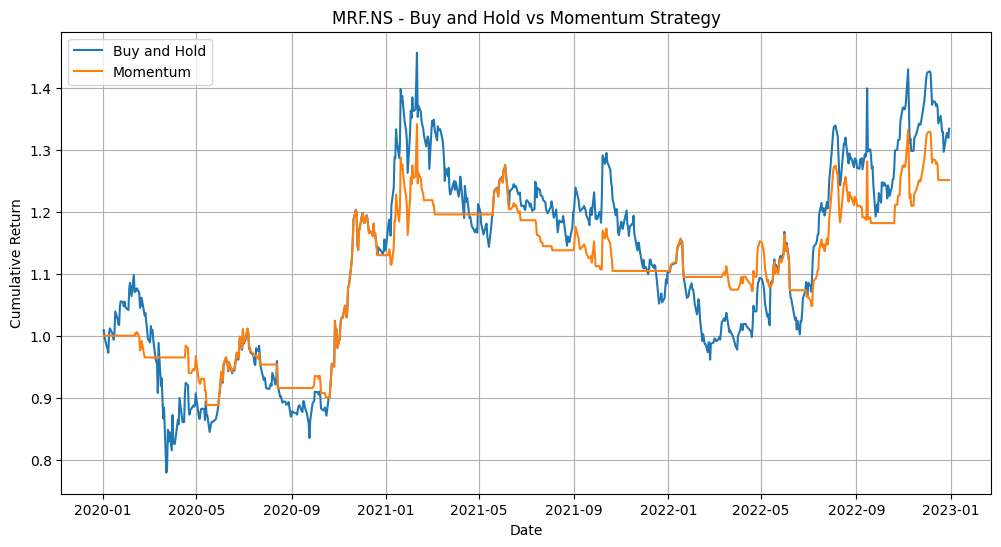

In [25]:
def compare_strategies(ticker, start_date, end_date, momentum_period=50):
    # Fetch data
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)

    # Calculate daily returns
    df['Daily_Return'] = df['Close'].pct_change()

    # Buy and Hold Strategy
    df['Buy_Hold'] = (1 + df['Daily_Return']).cumprod()

    # Momentum Strategy
    df['SMA'] = df['Close'].rolling(window=momentum_period).mean()
    df['Signal'] = np.where(df['Close'] > df['SMA'], 1, 0)
    df['Momentum_Return'] = df['Signal'].shift(1) * df['Daily_Return']
    df['Momentum'] = (1 + df['Momentum_Return']).cumprod()

    # Calculate metrics
    buy_hold_return = df['Buy_Hold'].iloc[-1] - 1
    momentum_return = df['Momentum'].iloc[-1] - 1

    buy_hold_sharpe = np.sqrt(252) * df['Daily_Return'].mean() / df['Daily_Return'].std()
    momentum_sharpe = np.sqrt(252) * df['Momentum_Return'].mean() / df['Momentum_Return'].std()

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Buy_Hold'], label='Buy and Hold')
    plt.plot(df.index, df['Momentum'], label='Momentum')
    plt.title(f'{ticker} - Buy and Hold vs Momentum Strategy')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid(True)

    # Print metrics
    print(f"Buy and Hold Total Return: {buy_hold_return:.2%}")
    print(f"Momentum Total Return: {momentum_return:.2%}")
    print(f"Buy and Hold Sharpe Ratio: {buy_hold_sharpe:.2f}")
    print(f"Momentum Sharpe Ratio: {momentum_sharpe:.2f}")

    plt.show()

    return df

# Example usage
ticker = "MRF.NS"  # Apple Inc.
start_date = "2020-01-01"
end_date = "2022-12-31"
momentum_period = 30

results = compare_strategies(ticker, start_date, end_date, momentum_period)

#UPTREND MOMENTUM

Buy and Hold Total Return: 112.73%
Momentum Total Return: 139.86%
Buy and Hold Sharpe Ratio: 0.92
Momentum Sharpe Ratio: 1.33


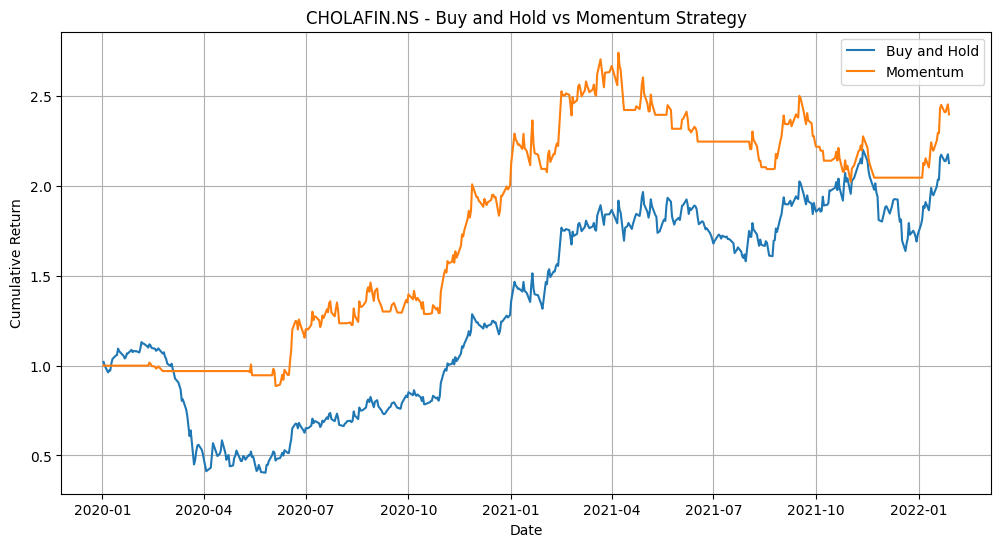

In [26]:
def compare_strategies(ticker, start_date, end_date, momentum_period=50):
    # Fetch data
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)

    # Calculate daily returns
    df['Daily_Return'] = df['Close'].pct_change()

    # Buy and Hold Strategy
    df['Buy_Hold'] = (1 + df['Daily_Return']).cumprod()

    # Momentum Strategy
    df['SMA'] = df['Close'].rolling(window=momentum_period).mean()
    df['Signal'] = np.where(df['Close'] > df['SMA'], 1, 0)
    df['Momentum_Return'] = df['Signal'].shift(1) * df['Daily_Return']
    df['Momentum'] = (1 + df['Momentum_Return']).cumprod()

    # Calculate metrics
    buy_hold_return = df['Buy_Hold'].iloc[-1] - 1
    momentum_return = df['Momentum'].iloc[-1] - 1

    buy_hold_sharpe = np.sqrt(252) * df['Daily_Return'].mean() / df['Daily_Return'].std()
    momentum_sharpe = np.sqrt(252) * df['Momentum_Return'].mean() / df['Momentum_Return'].std()

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Buy_Hold'], label='Buy and Hold')
    plt.plot(df.index, df['Momentum'], label='Momentum')
    plt.title(f'{ticker} - Buy and Hold vs Momentum Strategy')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid(True)

    # Print metrics
    print(f"Buy and Hold Total Return: {buy_hold_return:.2%}")
    print(f"Momentum Total Return: {momentum_return:.2%}")
    print(f"Buy and Hold Sharpe Ratio: {buy_hold_sharpe:.2f}")
    print(f"Momentum Sharpe Ratio: {momentum_sharpe:.2f}")

    plt.show()

    return df

# Example usage
ticker = "CHOLAFIN.NS"  # Apple Inc.
start_date = "2020-01-01"
end_date = "2022-01-31"
momentum_period = 30

results = compare_strategies(ticker, start_date, end_date, momentum_period)

# PORTFOLIO BACKTESTING

Skipping iteration at i = 1408 due to insufficient data or no momentum picks.
Skipping iteration at i = 1430 due to insufficient data or no momentum picks.
Skipping iteration at i = 1452 due to insufficient data or no momentum picks.
Skipping iteration at i = 1474 due to insufficient data or no momentum picks.
Skipping iteration at i = 1496 due to insufficient data or no momentum picks.
Skipping iteration at i = 1518 due to insufficient data or no momentum picks.
Skipping iteration at i = 1540 due to insufficient data or no momentum picks.
Skipping iteration at i = 1562 due to insufficient data or no momentum picks.
Skipping iteration at i = 1584 due to insufficient data or no momentum picks.
Date: 2020-02-12 00:00:00, Monthly Return: 0.0747
Date: 2020-03-17 00:00:00, Monthly Return: -0.2948
Date: 2020-04-22 00:00:00, Monthly Return: 0.0755
Date: 2020-05-26 00:00:00, Monthly Return: -0.0267
Date: 2020-06-25 00:00:00, Monthly Return: 0.2628
Date: 2020-07-27 00:00:00, Monthly Return: -0.

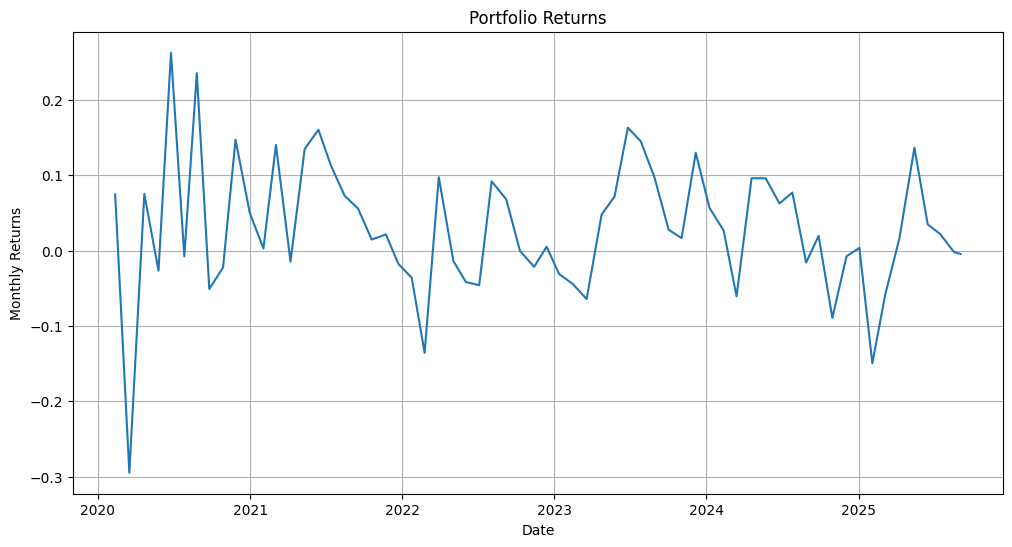

In [27]:
def backtest_strategy(data, start_date):
    # Filter data from the start date
    data = data[data.index >= start_date]

    # Calculate monthly returns using the momentum strategy
    results = calculate_monthly_returns(data)

    # Print numerical values of returns
    for date, return_value in results:
        print(f"Date: {date}, Monthly Return: {return_value:.4f}")  # Format to 4 decimal places

    # Extract dates and returns for plotting
    dates = [result[0] for result in results]
    returns = [result[1] for result in results]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(dates, returns)
    plt.xlabel('Date')
    plt.ylabel('Monthly Returns')
    plt.title('Portfolio Returns')
    plt.grid(True)
    plt.show()

    return results,returns

# Run the backtest
results,returns = backtest_strategy(data, start_date='2019-01-01')

In [28]:
def calculate_sortino_ratio(returns, risk_free_rate=0.05):
    mean_return = np.mean(returns)
    downside_returns = np.where(np.array(returns) < 0, returns, 0)
    downside_std = np.std(downside_returns)

    if downside_std == 0:
        return np.nan  # Undefined when there is no downside risk

    sortino_ratio = (mean_return - risk_free_rate) / downside_std
    return sortino_ratio
import pandas as pd

def drawdown(series):
    drawdown = (series - series.cummax()) / series.cummax()
    return drawdown.min()

def calculate_calmar_ratio(returns):
    cumulative_return = np.prod(1 + np.array(returns)) - 1
    annual_return = (1 + cumulative_return) ** (12 / len(returns)) - 1

    max_drawdown = drawdown(pd.Series(np.cumprod(1 + np.array(returns))))
    if max_drawdown == 0:
        return np.nan  # Undefined when there is no drawdown

    calmar_ratio = annual_return / abs(max_drawdown)
    return calmar_ratio


In [29]:
calmer_ratio = calculate_calmar_ratio(returns)
sortino_ratio = calculate_sortino_ratio(returns)

In [30]:
print('Sortino Ratio of the strategy: ',sortino_ratio)
print('Calmer Ratio of the strategy: ',calmer_ratio)

Sortino Ratio of the strategy:  -0.43437920934824586
Calmer Ratio of the strategy:  1.2236878632677441


In [31]:
def calculate_sharpe_ratio(returns_df, risk_free_rate=0.05):

    # Calculate Sharpe Ratio
    average_return = np.mean(returns)
    volatility = np.std(returns)

    if volatility == 0:
        return np.nan  # Return NaN if volatility is zero (undefined)

    sharpe_ratio = (average_return - risk_free_rate) / volatility * np.sqrt(252)  # Assuming 252 trading days in a year

    return sharpe_ratio

In [32]:
sharpe_ratio = calculate_sharpe_ratio(returns)
sharpe_ratio

np.float64(-3.566165739061049)